## **Machine Learning Classification Challenge on Rain Data Set**
Welcome to the machine learning challnege, in this scenario, you will be exploring classification on rain dataset

**Note** -
- Write the solution in this notebook by adding cells and follow the given instructions below. (Add additional notebook for coding if necessary)


## Provided Dataset and Instructions


 - The Training dataset provided here is Rain_Prediction_train.csv has 20000 records with a target attribute as **RainTomorrow** containing values **yes** and **no** respectively. Use this dataset to train your model.


- The testing set  Rain_Prediction_test.csv has 7908 records. 


- Here train the models by using four different algorithms namely - Logisitic Regression , Support Vector Machine , Decision Tree Classifier and Neural Networks (Multi-Layer Perceptron Classification) using scikit-learn package and save the models in the variables **search_log_reg** , **search_SVM** , **search_Decision** and **search_MLP** respectively.


- The final score evaluation is based on Accuracy Score, Macro - F1 Score and Area Under the ROC Curve Score (ROC - AUC Score) on the prediction dataset.


- **Hint** - Here try tuning the parameters of the models for better performance of the model

### Submission Details

- Write the code to build the model and predicts the `RainTomorrow` (0 or 1) for the records in Rain_Prediction_test.csv file.



- Once the predictions are ready for each models kindly save the predictions in the files named **Logistic_Predictions.csv**, **SVM_Predictions.csv**, **Decision_Predictions.csv** and **Neural_Predictions.csv**, which contains exactly 7908 rows. Each row contains the value of `RainTomorrow` (0 or 1) that corresponds to the record observations provided in the Rain_Prediction_test.csv file. 



- The submission prediction files should be of the below format.


<img src="csv_format.PNG">


**Note**

- Here, run the first three cells to import the necessary packages ,setup the environment and to download the datasets, and final two cells to save the models as pickle files in the directory and to evaluate the results. (Here before evaluating the results kindly save the prediction csv files in the directory).



- Here , this is the categorical codes for the target variable `RainTomorrow` -

 

- no - 0,

- yes - 1



- Additional packages can be installed in the notebook using the command: 

		 !pip3 install --user package_name

## Run the below cell to import the necessary packages required for the challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#The below code will install imblearn package
!pip3 install imblearn
import imblearn

## Run the below two cells to prepare the environmennt and download the dataset

In [2]:
!wget hrcdn.net/s3_pub/istreet-assets/hLgv0gBxC8WLHVPSteTk2A/Rain_Prediction_train.csv

!wget hrcdn.net/s3_pub/istreet-assets/aDTstXYSDKlEHvzEFfQRRw/Rain_Prediction_test.csv

--2021-09-18 05:51:49--  http://hrcdn.net/s3_pub/istreet-assets/hLgv0gBxC8WLHVPSteTk2A/Rain_Prediction_train.csv
Resolving hrcdn.net (hrcdn.net)... 23.212.254.99, 23.212.254.56, 2600:1417:75::17d4:fe38, ...
Connecting to hrcdn.net (hrcdn.net)|23.212.254.99|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://hrcdn.net/s3_pub/istreet-assets/hLgv0gBxC8WLHVPSteTk2A/Rain_Prediction_train.csv [following]
--2021-09-18 05:51:49--  https://hrcdn.net/s3_pub/istreet-assets/hLgv0gBxC8WLHVPSteTk2A/Rain_Prediction_train.csv
Connecting to hrcdn.net (hrcdn.net)|23.212.254.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2209070 (2.1M) [application/octet-stream]
Saving to: ‘Rain_Prediction_train.csv’

Rain_Prediction_tra 100%[===================>]   2.11M  1.85MB/s    in 1.1s    

2021-09-18 05:51:51 (1.85 MB/s) - ‘Rain_Prediction_train.csv’ saved [2209070/2209070]

URL transformed to HTTPS due to an HSTS policy
--2021-09-18 05:5

In [3]:
!pip3 install Classification-1.0-py2.py3-none-any.whl

Processing ./Classification-1.0-py2.py3-none-any.whl


In [ ]:
#Write your code here and add more cells for coding

In [236]:
df = pd.read_csv("Rain_Prediction_train.csv")

In [237]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,09/02/09,Williamtown,18.8,26.3,0.0,10.0,9.7,SSW,50.0,S,...,37.0,84.0,72.0,1010.8,1010.1,6.0,3.0,22.6,24.1,No
1,22/08/11,Darwin,16.3,31.8,0.0,8.6,11.3,E,50.0,SE,...,28.0,30.0,11.0,1017.8,1013.4,3.0,2.0,23.2,31.2,No
2,21/08/13,Moree,-1.1,15.9,0.0,5.0,10.9,SSW,39.0,SSW,...,20.0,53.0,23.0,1020.3,1016.4,1.0,1.0,7.9,15.3,No
3,29/10/10,Mildura,14.7,32.8,0.0,7.2,7.3,W,61.0,NNE,...,26.0,34.0,16.0,1010.2,1006.0,6.0,7.0,23.2,30.8,Yes
4,08/06/14,Cairns,18.4,20.3,15.8,3.8,0.0,SSW,35.0,S,...,11.0,90.0,94.0,1016.8,1014.5,8.0,8.0,19.5,20.1,Yes


In [238]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

In [239]:
df["Location"].unique()

array(['Williamtown', 'Darwin', 'Moree', 'Mildura', 'Cairns',
       'Townsville', 'MountGambier', 'MelbourneAirport', 'Nuriootpa',
       'Watsonia', 'Sale', 'Portland', 'Canberra', 'NorfolkIsland',
       'Melbourne', 'Woomera', 'Brisbane', 'CoffsHarbour', 'AliceSprings',
       'Perth', 'Cobar', 'Hobart', 'SydneyAirport', 'Sydney',
       'WaggaWagga', 'PerthAirport'], dtype=object)

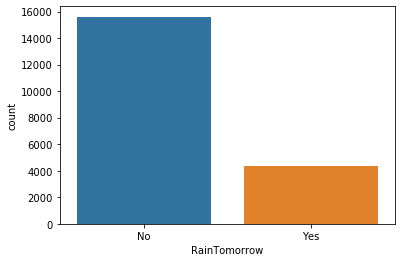

In [240]:
sns.countplot(df['RainTomorrow'],label = "Count")

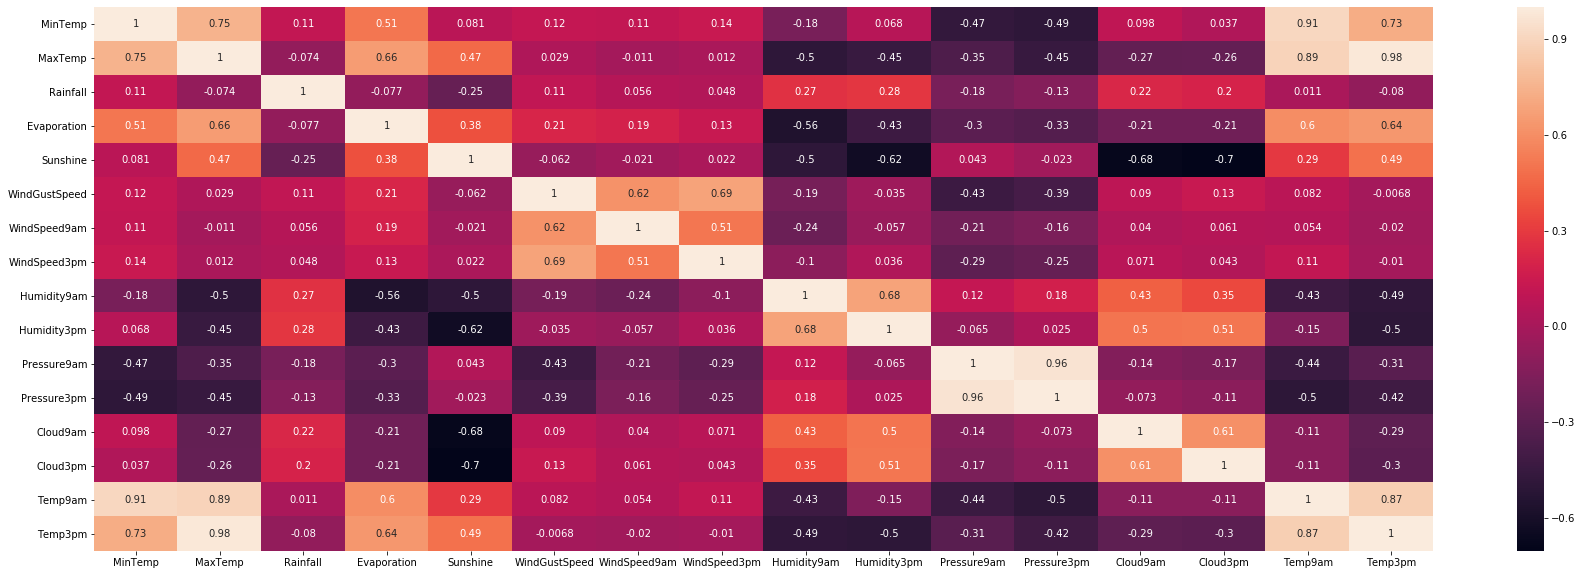

In [241]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(),annot = True)

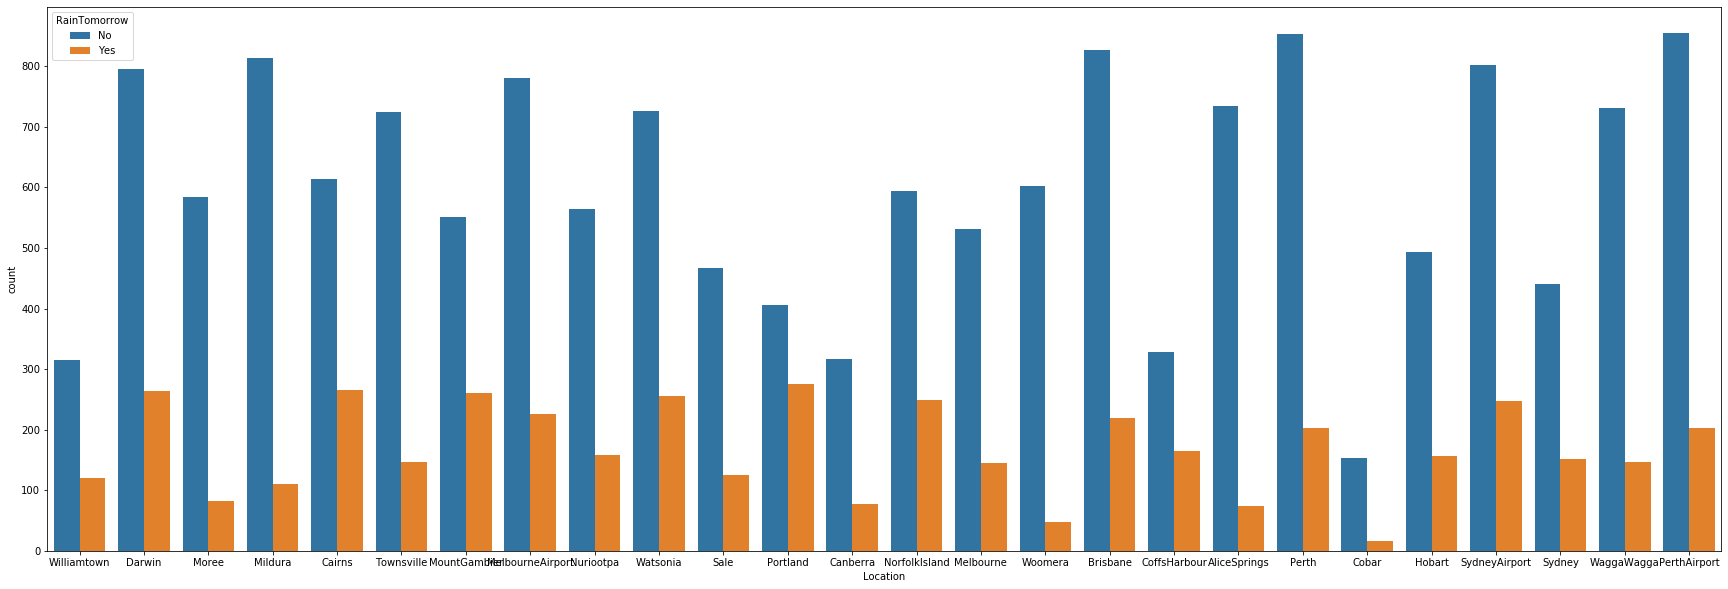

In [242]:
plt.figure(figsize = (30,10))
sns.countplot( x = 'Location',hue ="RainTomorrow", data=df)

In [243]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["RainTomorrow"])
df["RainTomorrow"] = le.transform(df["RainTomorrow"])

In [244]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,09/02/09,Williamtown,18.8,26.3,0.0,10.0,9.7,SSW,50.0,S,...,37.0,84.0,72.0,1010.8,1010.1,6.0,3.0,22.6,24.1,0
1,22/08/11,Darwin,16.3,31.8,0.0,8.6,11.3,E,50.0,SE,...,28.0,30.0,11.0,1017.8,1013.4,3.0,2.0,23.2,31.2,0
2,21/08/13,Moree,-1.1,15.9,0.0,5.0,10.9,SSW,39.0,SSW,...,20.0,53.0,23.0,1020.3,1016.4,1.0,1.0,7.9,15.3,0
3,29/10/10,Mildura,14.7,32.8,0.0,7.2,7.3,W,61.0,NNE,...,26.0,34.0,16.0,1010.2,1006.0,6.0,7.0,23.2,30.8,1
4,08/06/14,Cairns,18.4,20.3,15.8,3.8,0.0,SSW,35.0,S,...,11.0,90.0,94.0,1016.8,1014.5,8.0,8.0,19.5,20.1,1


In [245]:
cat_col = ['WindGustDir','WindDir9am','WindDir3pm']
for col in cat_col:
    print(np.unique(df[col]))

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [246]:
df = pd.get_dummies(df,columns=cat_col)

In [247]:
df.iloc[3:9]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
3,29/10/10,Mildura,14.7,32.8,0.0,7.2,7.3,61.0,22.0,26.0,...,0,0,0,0,0,0,0,0,0,0
4,08/06/14,Cairns,18.4,20.3,15.8,3.8,0.0,35.0,13.0,11.0,...,0,0,0,1,0,0,0,0,0,0
5,02/10/14,Townsville,15.8,27.7,0.0,8.4,11.5,31.0,13.0,20.0,...,0,0,0,0,0,0,0,0,0,0
6,01/03/11,MountGambier,11.6,17.9,1.0,3.6,10.7,52.0,30.0,30.0,...,0,0,0,0,0,1,0,0,0,0
7,26/01/10,MelbourneAirport,11.3,25.6,0.0,7.0,9.9,43.0,11.0,26.0,...,0,0,0,0,1,0,0,0,0,0
8,14/04/12,Nuriootpa,7.9,27.3,0.0,4.4,10.1,43.0,6.0,22.0,...,0,0,0,0,0,0,0,0,1,0


In [248]:
df = df.drop(["Location"],axis = 1)

In [249]:
df = df.drop(["Date"],axis = 1)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 65 columns):
MinTemp            20000 non-null float64
MaxTemp            20000 non-null float64
Rainfall           20000 non-null float64
Evaporation        20000 non-null float64
Sunshine           20000 non-null float64
WindGustSpeed      20000 non-null float64
WindSpeed9am       20000 non-null float64
WindSpeed3pm       20000 non-null float64
Humidity9am        20000 non-null float64
Humidity3pm        20000 non-null float64
Pressure9am        20000 non-null float64
Pressure3pm        20000 non-null float64
Cloud9am           20000 non-null float64
Cloud3pm           20000 non-null float64
Temp9am            20000 non-null float64
Temp3pm            20000 non-null float64
RainTomorrow       20000 non-null int64
WindGustDir_E      20000 non-null uint8
WindGustDir_ENE    20000 non-null uint8
WindGustDir_ESE    20000 non-null uint8
WindGustDir_N      20000 non-null uint8
WindGustDir_NE     

In [251]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,18.8,26.3,0.0,10.0,9.7,50.0,19.0,37.0,84.0,72.0,...,0,0,1,0,0,0,0,0,0,0
1,16.3,31.8,0.0,8.6,11.3,50.0,20.0,28.0,30.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,-1.1,15.9,0.0,5.0,10.9,39.0,13.0,20.0,53.0,23.0,...,0,0,0,0,0,0,1,0,0,0
3,14.7,32.8,0.0,7.2,7.3,61.0,22.0,26.0,34.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,18.4,20.3,15.8,3.8,0.0,35.0,13.0,11.0,90.0,94.0,...,0,0,0,1,0,0,0,0,0,0


In [252]:
# from sklearn import preprocessing
# sc = preprocessing.MinMaxScaler()
# sc.fit(df)
# df = pd.DataFrame(sc.transform(df),index = df.index,columns = df.columns)

In [253]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,18.8,26.3,0.0,10.0,9.7,50.0,19.0,37.0,84.0,72.0,...,0,0,1,0,0,0,0,0,0,0
1,16.3,31.8,0.0,8.6,11.3,50.0,20.0,28.0,30.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,-1.1,15.9,0.0,5.0,10.9,39.0,13.0,20.0,53.0,23.0,...,0,0,0,0,0,0,1,0,0,0
3,14.7,32.8,0.0,7.2,7.3,61.0,22.0,26.0,34.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,18.4,20.3,15.8,3.8,0.0,35.0,13.0,11.0,90.0,94.0,...,0,0,0,1,0,0,0,0,0,0


In [254]:
y = df["RainTomorrow"]

In [255]:
X = df.drop(["RainTomorrow"],axis = 1)

In [256]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [257]:
from imblearn.over_sampling import SVMSMOTE
smk = SVMSMOTE(sampling_strategy = "minority")
X_train, y_train = smk.fit_resample(X_train,y_train)

In [263]:
from sklearn.linear_model import LogisticRegression
search_log_reg = LogisticRegression(C=10,penalty = 'l1',solver = "liblinear",random_state = 42)
search_log_reg.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [259]:
from sklearn.tree import DecisionTreeClassifier
search_Decision = DecisionTreeClassifier(random_state = 42)
search_Decision.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [260]:
from sklearn.svm import SVC
search_SVM  = SVC(random_state = 42)
search_SVM .fit(X_train,y_train)

SVC(random_state=42)

In [290]:
from sklearn.neural_network import MLPClassifier
search_MLP =  MLPClassifier(max_iter=500, activation='relu',random_state = 42)
search_MLP.fit(X_train,y_train)

MLPClassifier(max_iter=500, random_state=42)

In [291]:
LR_y_pred =  search_log_reg.predict(X_test)
DT_y_pred = search_Decision.predict(X_test)
SVM_y_pred = search_SVM.predict(X_test)
MLP_y_pred = search_MLP.predict(X_test)

In [292]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report,roc_auc_score

Accuracy Score: 0.83575
F1_score Macro: 0.7540931835248048


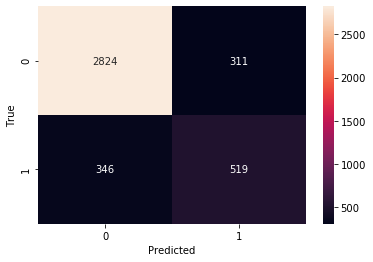

In [293]:
matrix = confusion_matrix(y_test,LR_y_pred)
sns.heatmap(matrix,annot = True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
print ("Accuracy Score:",accuracy_score(y_test,LR_y_pred))
print("F1_score Macro:", f1_score(y_test,LR_y_pred,average = "macro"))

Accuracy Score: 0.78275
F1_score Macro: 0.6988828258304827


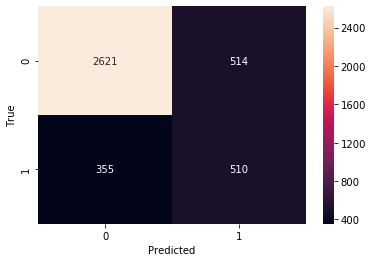

In [294]:
matrix = confusion_matrix(y_test,DT_y_pred)
sns.heatmap(matrix,annot = True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
print ("Accuracy Score:",accuracy_score(y_test,DT_y_pred))
print("F1_score Macro:", f1_score(y_test,DT_y_pred,average = "macro"))

Accuracy Score: 0.8125
F1_score Macro: 0.7441010166354811


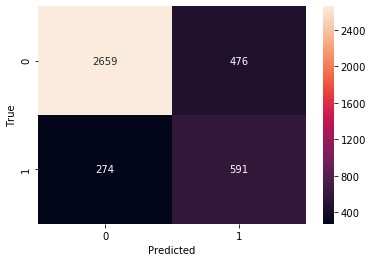

In [295]:
matrix = confusion_matrix(y_test,SVM_y_pred)
sns.heatmap(matrix,annot = True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
print ("Accuracy Score:",accuracy_score(y_test,SVM_y_pred))
print("F1_score Macro:", f1_score(y_test,SVM_y_pred,average = "macro"))

Accuracy Score: 0.85175
F1_score Macro: 0.7442960060480678


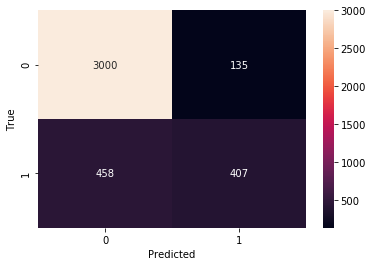

In [296]:
matrix = confusion_matrix(y_test,MLP_y_pred)
sns.heatmap(matrix,annot = True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
print ("Accuracy Score:",accuracy_score(y_test,MLP_y_pred))
print("F1_score Macro:", f1_score(y_test,MLP_y_pred,average = "macro"))

In [297]:
df2 = pd.read_csv("Rain_Prediction_test.csv")

In [298]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,01/03/12,Portland,15.7,19.9,6.4,1.4,6.3,SE,63.0,SE,...,33.0,35.0,79.0,80.0,1012.2,1014.4,7.0,7.0,17.1,16.9
1,23/03/17,MelbourneAirport,14.2,24.8,0.4,2.0,9.0,S,35.0,SSE,...,19.0,15.0,82.0,49.0,1020.4,1018.4,7.0,7.0,17.0,24.2
2,14/04/10,Hobart,13.3,17.3,0.0,3.2,3.9,NW,70.0,NW,...,35.0,31.0,54.0,53.0,1014.9,1013.7,5.0,7.0,15.5,16.2
3,10/07/10,Darwin,21.9,33.2,0.0,5.2,10.8,ENE,37.0,ESE,...,20.0,13.0,72.0,39.0,1015.2,1011.7,2.0,2.0,25.1,31.7
4,26/09/12,Woomera,14.2,33.5,0.0,12.0,10.6,N,65.0,N,...,35.0,35.0,12.0,5.0,1012.0,1007.1,5.0,2.0,21.1,32.2


In [299]:
df2= df2.drop(["Date","Location"],axis = 1)

In [300]:
cat_col2 = ['WindGustDir','WindDir9am','WindDir3pm']
for col in cat_col2:
    print(np.unique(df2[col]))

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [301]:
df2 = pd.get_dummies(df2,columns=cat_col2)

In [302]:
predict_log_test_data = search_log_reg.predict(df2)

In [303]:
predict_log_test_data

array([1, 0, 1, ..., 0, 0, 0])

In [285]:
submit1 = pd.DataFrame({'RainTomorrow':predict_log_test_data})

In [286]:
submit1.head()

,RainTomorrow
0,1
1,0
2,1
3,0
4,0


In [288]:
filename = 'Logistic_Predictions.csv'
submit1.to_csv(filename, index= False)

In [309]:
predict_dt_test_data = search_Decision.predict(df2)
submit2 = pd.DataFrame({'RainTomorrow':predict_dt_test_data})

In [311]:
filename1 = 'Decision_Predictions.csv'
submit2.to_csv(filename1, index= False)

In [308]:
predict_SVM_test_data = search_SVM.predict(df2)
submit3 = pd.DataFrame({'RainTomorrow':predict_SVM_test_data})

In [312]:
filename2 = 'SVM_Predictions.csv'
submit3.to_csv(filename2, index= False)

In [314]:
predict_ML_test_data = search_MLP.predict(df2)
submit4 = pd.DataFrame({'RainTomorrow':predict_ML_test_data})

In [315]:
filename3 = 'Neural_Predictions.csv'
submit4.to_csv(filename3, index= False)

## Run the below cell to save the models for evaluation


In [316]:
import pickle
#save the Logistic Regression model 
filename = 'Log_Reg.pkl'
pickle.dump(search_log_reg, open(filename, 'wb'))

#save the Support Vector Machine model 
filename = 'SVM.pkl'
pickle.dump(search_SVM, open(filename, 'wb'))

#save the Decision Tree Classsifier model 
filename = 'Decision.pkl'
pickle.dump(search_Decision, open(filename, 'wb'))

#save the Neural Network model 
filename = 'Neural.pkl'
pickle.dump(search_MLP, open(filename, 'wb'))


## Run the below cell to evaluate the results

In [317]:
from Classification import evaluate
evaluate.evaluation()

FS_SCORE:80%


# All the best. May your models predict as accurately as possible. 